In [1]:
import pandas as pd
data=pd.read_csv('Stock_Price_MAX.csv', encoding = 'ISO-8859-1')

In [2]:
data.shape

(4392, 7)

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600


In [4]:
df =  data.iloc[:,[1,2,3,4,6]]

In [5]:
df.head()

,Open,High,Low,Close,Volume
0,3.812500,4.156250,3.812500,4.125000,3675600
1,4.125000,4.125000,4.000000,4.015625,1077600
2,4.000000,4.031250,3.953125,4.000000,437200
3,4.000000,4.000000,3.843750,3.843750,1883600
4,3.734375,3.734375,3.390625,3.390625,7931600


In [6]:
closed_df = df.iloc[:,[3]]

In [7]:
normalized_df = df.iloc[:,[0,1,2,4]]

In [8]:
#Z-Score
from scipy.stats import zscore
for col in normalized_df.columns:
    col_zscore = col + '_zscore'
    normalized_df[col_zscore] = zscore(normalized_df[col])
    normalized_df.drop(col, axis=1, inplace=True)

In [9]:
normalized_df.head()

,Open_zscore,High_zscore,Low_zscore,Volume_zscore
0,-0.894311,-0.885122,-0.892408,1.104938
1,-0.883863,-0.886157,-0.886076,-0.497357
2,-0.888042,-0.889261,-0.887659,-0.892319
3,-0.888042,-0.890295,-0.891353,-0.000263
4,-0.896922,-0.899088,-0.906655,3.729791


In [10]:
df_final = pd.concat([normalized_df, closed_df], axis=1)

In [11]:
df_final.shape

(4392, 5)

In [12]:
df_final.head()

,Open_zscore,High_zscore,Low_zscore,Volume_zscore,Close
0,-0.894311,-0.885122,-0.892408,1.104938,4.125000
1,-0.883863,-0.886157,-0.886076,-0.497357,4.015625
2,-0.888042,-0.889261,-0.887659,-0.892319,4.000000
3,-0.888042,-0.890295,-0.891353,-0.000263,3.843750
4,-0.896922,-0.899088,-0.906655,3.729791,3.390625


In [58]:
train_size = int(len(df_final) * 0.70)

In [59]:
X_train_df = df_final.iloc[:train_size, [0,1,2,3]]

In [60]:
y_train_df = df_final.iloc[:train_size, 4]

In [72]:
X_test_df = df_final.iloc[train_size:, [0,1,2,3]]

In [73]:
y_test_df = df_final.iloc[train_size:, 4]

In [121]:
tns_X_train = X_train_df.as_matrix(columns=None)
tns_y_train = y_train_df.as_matrix(columns=None)
tns_X_test = X_test_df.as_matrix(columns=None)
tns_y_test = y_test_df.as_matrix(columns=None)
print(tns_X_train.shape, tns_y_train.shape, tns_X_test.shape, tns_y_test.shape)

(3074, 4) (3074,) (1318, 4) (1318,)


# Fully Connected Neural Network

In [79]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense
from keras.layers import Dropout

In [153]:
# Define ModelCheckpoint outside the loop
checkpointer = ModelCheckpoint(filepath="tns/weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    tns_model = Sequential()
    # Build network
    tns_model.add(Dense(130, input_dim = tns_X_train.shape[1], activation='relu')) # Hidden 1
    tns_model.add(Dropout(0.10))
    tns_model.add(Dense(80, activation='relu')) # Hidden 2
    tns_model.add(Dropout(0.10))
    tns_model.add(Dense(30, activation='relu')) # Hidden 3
    tns_model.add(Dense(1)) # Output

    tns_model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    tns_model.fit(tns_X_train, tns_y_train, validation_data = (tns_X_test, tns_y_test), callbacks=[monitor, checkpointer], 
                  verbose=2,epochs=100)

0
Train on 3074 samples, validate on 1318 samples
Epoch 1/100
 - 31s - loss: 223.8821 - val_loss: 173.5744
Epoch 2/100
 - 2s - loss: 34.4206 - val_loss: 605.2360
Epoch 3/100
 - 2s - loss: 9.9900 - val_loss: 118.1167
Epoch 4/100
 - 2s - loss: 3.4428 - val_loss: 26.7248
Epoch 5/100
 - 2s - loss: 2.1673 - val_loss: 14.5633
Epoch 6/100
 - 2s - loss: 1.8376 - val_loss: 0.9536
Epoch 7/100
 - 2s - loss: 1.6820 - val_loss: 9.2721
Epoch 8/100
 - 2s - loss: 1.4846 - val_loss: 2.6291
Epoch 9/100
 - 2s - loss: 1.9963 - val_loss: 1.0624
Epoch 10/100
 - 2s - loss: 1.4239 - val_loss: 0.9197
Epoch 11/100
 - 2s - loss: 1.7566 - val_loss: 0.5387
Epoch 12/100
 - 2s - loss: 1.5765 - val_loss: 0.4875
Epoch 13/100
 - 2s - loss: 1.4954 - val_loss: 2.6395
Epoch 14/100
 - 2s - loss: 1.3331 - val_loss: 3.1520
Epoch 15/100
 - 2s - loss: 1.3463 - val_loss: 0.9523
Epoch 16/100
 - 2s - loss: 1.3582 - val_loss: 1.5935
Epoch 17/100
 - 2s - loss: 1.3374 - val_loss: 8.5619
Epoch 00017: early stopping
1
Train on 3074 sa

In [154]:
tns_model.load_weights('tns/weights.hdf5')
tns_pred = tns_model.predict(tns_X_test)
score = np.sqrt(metrics.mean_squared_error(tns_y_test, tns_pred)) 

print("RMSE: {}".format(score))
print("R2 score",metrics.r2_score(tns_y_test, tns_pred))
print("MSE:: ", metrics.mean_squared_error(tns_y_test, tns_pred))

RMSE: 0.6982330752187035
R2 score 0.9993657067543181
MSE::  0.4875294273293676


In [22]:
# Regression chart.
import matplotlib.pyplot as plt
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

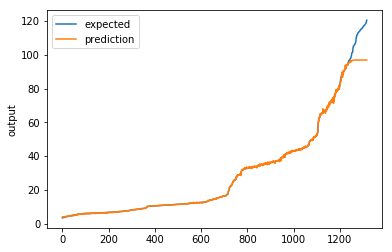

In [23]:
# Plot the chart
chart_regression(tns_pred.flatten(), tns_y_test)

# LSTM

In [102]:
lstm_train_df = df_final.iloc[:train_size]
lstm_train_df.shape

(3074, 5)

In [103]:
lstm_test_df = df_final.iloc[train_size+1:]
lstm_test_df.shape

(1317, 5)

In [104]:
list_X_train = lstm_train_df.as_matrix(columns=None)

In [105]:
list_X_test = lstm_test_df.as_matrix(columns=None)

In [107]:
import numpy as np

def to_sequences(SEQUENCE_SIZE, data):
    lstm_X = []
    lstm_y = []

    for i in range(len(data)-SEQUENCE_SIZE-1):
        #print(i)
        window = data[i:(i+SEQUENCE_SIZE)]
        
        after_window = data[i+SEQUENCE_SIZE, 4]
        
        #window = [[x] for x in window]
                
        lstm_X.append(window)
        
        lstm_y.append(after_window)
        
    return np.array(lstm_X),np.array(lstm_y)

In [108]:
SEQUENCE_SIZE = 7

lstm_X_train, lstm_y_train = to_sequences(SEQUENCE_SIZE, list_X_train)

print("Shape of x_train: {}".format(lstm_X_train.shape))
print("Shape of y_train: {}".format(lstm_y_train.shape))

Shape of x_train: (3066, 7, 5)
Shape of y_train: (3066,)


In [109]:
lstm_X_test, lstm_y_test = to_sequences(SEQUENCE_SIZE, list_X_test)

print("Shape of x_test: {}".format(lstm_X_test.shape))
print("Shape of y_test: {}".format(lstm_y_test.shape))

Shape of x_test: (1309, 7, 5)
Shape of y_test: (1309,)


In [110]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
import numpy as np

checkpointer = ModelCheckpoint(filepath="lstm/best_weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    
    print(i)
    print('Build model...')
    
    lstm_model = Sequential()

    lstm_model.add(LSTM(256, activation='relu', dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE,5)))
    lstm_model.add(Dropout(0.10))
    lstm_model.add(Dense(150, activation='relu'))
    lstm_model.add(Dropout(0.10))
    lstm_model.add(Dense(100, activation='relu'))
    lstm_model.add(Dropout(0.10))
    lstm_model.add(Dense(50, activation='relu'))
    lstm_model.add(Dense(1))

    lstm_model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    print('Train...')

    lstm_model.fit(lstm_X_train, lstm_y_train, validation_data=(lstm_X_test, lstm_y_test), 
                   callbacks=[monitor, checkpointer], verbose=2, epochs=100)

0
Build model...
Train...
Train on 3066 samples, validate on 1309 samples
Epoch 1/100
 - 17s - loss: 36.1890 - val_loss: 241.0106
Epoch 2/100
 - 6s - loss: 13.0166 - val_loss: 384.8536
Epoch 3/100
 - 7s - loss: 5.6167 - val_loss: 372.8344
Epoch 4/100
 - 8s - loss: 6.6765 - val_loss: 436.5003
Epoch 5/100
 - 7s - loss: 3.7897 - val_loss: 364.0614
Epoch 6/100
 - 7s - loss: 3.8868 - val_loss: 277.1533
Epoch 00006: early stopping
1
Build model...
Train...
Train on 3066 samples, validate on 1309 samples
Epoch 1/100
 - 20s - loss: 47.3441 - val_loss: 307.7120
Epoch 2/100
 - 7s - loss: 10.6463 - val_loss: 351.4552
Epoch 3/100
 - 7s - loss: 5.2170 - val_loss: 350.5377
Epoch 4/100
 - 7s - loss: 4.0612 - val_loss: 293.9534
Epoch 5/100
 - 7s - loss: 4.2812 - val_loss: 376.8109
Epoch 6/100
 - 6s - loss: 3.6916 - val_loss: 563.1247
Epoch 7/100
 - 8s - loss: 3.6197 - val_loss: 209.5149
Epoch 8/100
 - 7s - loss: 3.1921 - val_loss: 204.4415
Epoch 9/100
 - 7s - loss: 2.7583 - val_loss: 334.4006
Epoch 10

In [111]:
lstm_model.load_weights('lstm/best_weights.hdf5')

lstm_pred = lstm_model.predict(lstm_X_test)

score = np.sqrt(metrics.mean_squared_error(lstm_y_test, lstm_pred)) 

print("RMSE: {}".format(score))
print("R2 score",metrics.r2_score(lstm_y_test, lstm_pred))
print("MSE:: ", metrics.mean_squared_error(lstm_y_test, lstm_pred))

RMSE: 12.588467954826672
R2 score 0.7943254625791336
MSE::  158.469525449698


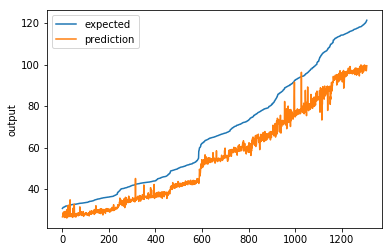

In [112]:
# Plot the chart
chart_regression(lstm_pred.flatten(), lstm_y_test)

# CNN

In [113]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout
from keras import regularizers

In [114]:
cnn_X_train = lstm_X_train.reshape(lstm_X_train.shape[0], 1, SEQUENCE_SIZE, 5)
cnn_X_test = lstm_X_test.reshape(lstm_X_test.shape[0], 1, SEQUENCE_SIZE, 5)

In [115]:
input_shape=(1, SEQUENCE_SIZE, 5)

In [116]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),activation='relu',input_shape=input_shape, padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1),activation='relu',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Conv2D(128,kernel_size=(3, 3), strides=(1, 1),activation='relu',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Conv2D(256,kernel_size=(3, 3), strides=(1, 1),activation='relu',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(500, activation='relu'))
cnn_model.add(Dense(1))
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 1, 7, 32)          1472      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 4, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 2, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 1, 2, 128)         73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 1, 256)         295168    
__________

In [117]:
checkpointer = ModelCheckpoint(filepath="cnn/weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)   
    cnn_model.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=2, verbose=1, mode='auto')
    cnn_model.fit(cnn_X_train, lstm_y_train, batch_size=128, validation_data=(cnn_X_test, lstm_y_test), 
                  callbacks=[monitor, checkpointer], verbose=2, epochs=100)

0
Train on 3066 samples, validate on 1309 samples
Epoch 1/100
 - 12s - loss: 118.0314 - val_loss: 210.1251
Epoch 2/100
 - 3s - loss: 4.1687 - val_loss: 9.1381
Epoch 3/100
 - 3s - loss: 0.7747 - val_loss: 5.9600
Epoch 4/100
 - 3s - loss: 0.3981 - val_loss: 5.5483
Epoch 5/100
 - 3s - loss: 0.3846 - val_loss: 5.4891
Epoch 6/100
 - 3s - loss: 0.3640 - val_loss: 4.9345
Epoch 7/100
 - 3s - loss: 0.3548 - val_loss: 6.0107
Epoch 8/100
 - 3s - loss: 0.3508 - val_loss: 4.7815
Epoch 9/100
 - 3s - loss: 0.3367 - val_loss: 5.2647
Epoch 10/100
 - 3s - loss: 0.3267 - val_loss: 5.4316
Epoch 00010: early stopping
1
Train on 3066 samples, validate on 1309 samples
Epoch 1/100
 - 11s - loss: 9.3225 - val_loss: 41.5078
Epoch 2/100
 - 3s - loss: 1.3360 - val_loss: 5.1849
Epoch 3/100
 - 3s - loss: 0.4144 - val_loss: 5.0953
Epoch 4/100
 - 3s - loss: 0.3162 - val_loss: 4.5214
Epoch 5/100
 - 3s - loss: 0.3157 - val_loss: 4.3854
Epoch 6/100
 - 3s - loss: 0.3056 - val_loss: 4.3156
Epoch 7/100
 - 3s - loss: 0.2997

In [118]:
cnn_model.load_weights('cnn/weights.hdf5')

cnn_pred = cnn_model.predict(cnn_X_test)

score = np.sqrt(metrics.mean_squared_error(lstm_y_test, cnn_pred)) 

print("RMSE: {}".format(score))
print("R2 score",metrics.r2_score(lstm_y_test, cnn_pred))
print("MSE:: ", metrics.mean_squared_error(lstm_y_test, cnn_pred))

RMSE: 1.7987426916926026
R2 score 0.9958007391150178
MSE::  3.2354752709175494


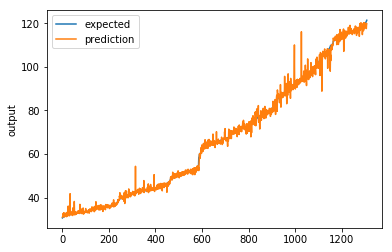

In [119]:
# Plot the chart
chart_regression(cnn_pred.flatten(), lstm_y_test)

# Parameter Tunning for Fully-connected Neural Networks

In [122]:
# relu, sigmoid, sigmoid & adam
checkpointer = ModelCheckpoint(filepath="tns/weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    tns_model = Sequential()
    # Build network
    tns_model.add(Dense(130, input_dim = tns_X_train.shape[1], activation='relu')) # Hidden 1
    tns_model.add(Dropout(0.10))
    tns_model.add(Dense(80, activation='sigmoid')) # Hidden 2
    tns_model.add(Dropout(0.10))
    tns_model.add(Dense(30, activation='sigmoid')) # Hidden 3
    tns_model.add(Dense(1)) # Output

    tns_model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    tns_model.fit(tns_X_train, tns_y_train, validation_data = (tns_X_test, tns_y_test), callbacks=[monitor, checkpointer], 
                  verbose=2,epochs=100)

0
Train on 3074 samples, validate on 1318 samples
Epoch 1/100
 - 34s - loss: 284.2375 - val_loss: 4804.5072
Epoch 2/100
 - 1s - loss: 226.6877 - val_loss: 4612.1116
Epoch 3/100
 - 1s - loss: 197.7845 - val_loss: 4429.9155
Epoch 4/100
 - 1s - loss: 175.5704 - val_loss: 4279.0201
Epoch 5/100
 - 1s - loss: 159.4964 - val_loss: 4149.0163
Epoch 6/100
 - 1s - loss: 147.5454 - val_loss: 4035.7496
Epoch 7/100
 - 1s - loss: 138.7893 - val_loss: 3937.3419
Epoch 8/100
 - 1s - loss: 132.6996 - val_loss: 3854.5916
Epoch 9/100
 - 1s - loss: 128.4355 - val_loss: 3785.6940
Epoch 10/100
 - 1s - loss: 125.6167 - val_loss: 3727.4955
Epoch 11/100
 - 1s - loss: 123.6957 - val_loss: 3678.7514
Epoch 12/100
 - 1s - loss: 122.5414 - val_loss: 3640.9059
Epoch 13/100
 - 1s - loss: 121.8390 - val_loss: 3613.0949
Epoch 14/100
 - 1s - loss: 121.3940 - val_loss: 3589.0651
Epoch 15/100
 - 1s - loss: 121.0879 - val_loss: 3568.0915
Epoch 16/100
 - 1s - loss: 120.9431 - val_loss: 3556.6978
Epoch 17/100
 - 1s - loss: 109

 - 1s - loss: 2.8922 - val_loss: 1701.9992
Epoch 45/100
 - 1s - loss: 2.6177 - val_loss: 1678.9038
Epoch 46/100
 - 1s - loss: 2.3405 - val_loss: 1657.0294
Epoch 47/100
 - 1s - loss: 2.1074 - val_loss: 1634.9400
Epoch 48/100
 - 1s - loss: 1.8701 - val_loss: 1614.4396
Epoch 49/100
 - 1s - loss: 1.6625 - val_loss: 1595.6697
Epoch 50/100
 - 1s - loss: 1.5257 - val_loss: 1577.5520
Epoch 51/100
 - 1s - loss: 1.3442 - val_loss: 1559.5487
Epoch 52/100
 - 1s - loss: 1.2169 - val_loss: 1542.7186
Epoch 53/100
 - 1s - loss: 1.0958 - val_loss: 1524.6734
Epoch 54/100
 - 1s - loss: 0.9828 - val_loss: 1510.1014
Epoch 55/100
 - 1s - loss: 0.8647 - val_loss: 1495.8484
Epoch 56/100
 - 1s - loss: 0.7864 - val_loss: 1482.5048
Epoch 57/100
 - 1s - loss: 0.7640 - val_loss: 1468.9137
Epoch 58/100
 - 1s - loss: 0.6523 - val_loss: 1457.2716
Epoch 59/100
 - 1s - loss: 0.6276 - val_loss: 1446.0781
Epoch 60/100
 - 1s - loss: 0.5974 - val_loss: 1435.5345
Epoch 61/100
 - 1s - loss: 0.5539 - val_loss: 1425.5321
Epoch

 - 1s - loss: 0.2339 - val_loss: 1286.1946
Epoch 90/100
 - 1s - loss: 0.2650 - val_loss: 1286.1274
Epoch 91/100
 - 1s - loss: 0.2526 - val_loss: 1284.4445
Epoch 92/100
 - 1s - loss: 0.2302 - val_loss: 1281.9936
Epoch 93/100
 - 1s - loss: 0.2336 - val_loss: 1280.9292
Epoch 94/100
 - 1s - loss: 0.2360 - val_loss: 1279.3108
Epoch 95/100
 - 1s - loss: 0.2434 - val_loss: 1278.1338
Epoch 96/100
 - 1s - loss: 0.2396 - val_loss: 1278.0292
Epoch 97/100
 - 1s - loss: 0.2245 - val_loss: 1275.2705
Epoch 98/100
 - 1s - loss: 0.2154 - val_loss: 1273.5251
Epoch 99/100
 - 1s - loss: 0.2229 - val_loss: 1273.0460
Epoch 100/100
 - 1s - loss: 0.2298 - val_loss: 1273.4800
3
Train on 3074 samples, validate on 1318 samples
Epoch 1/100
 - 15s - loss: 257.7175 - val_loss: 4650.9860
Epoch 2/100
 - 1s - loss: 201.9829 - val_loss: 4442.0520
Epoch 3/100
 - 1s - loss: 175.8677 - val_loss: 4271.9887
Epoch 4/100
 - 1s - loss: 158.1242 - val_loss: 4129.8428
Epoch 5/100
 - 1s - loss: 145.5276 - val_loss: 4007.9903
Epoc

Epoch 33/100
 - 1s - loss: 4.5560 - val_loss: 1798.4038
Epoch 34/100
 - 1s - loss: 4.0354 - val_loss: 1768.0315
Epoch 35/100
 - 1s - loss: 3.5944 - val_loss: 1740.4853
Epoch 36/100
 - 1s - loss: 3.1685 - val_loss: 1713.7804
Epoch 37/100
 - 1s - loss: 2.8534 - val_loss: 1688.5745
Epoch 38/100
 - 1s - loss: 2.5218 - val_loss: 1664.5159
Epoch 39/100
 - 1s - loss: 2.2349 - val_loss: 1642.0417
Epoch 40/100
 - 1s - loss: 2.0670 - val_loss: 1619.8926
Epoch 41/100
 - 1s - loss: 1.8235 - val_loss: 1599.4517
Epoch 42/100
 - 1s - loss: 1.6193 - val_loss: 1579.3809
Epoch 43/100
 - 1s - loss: 1.4257 - val_loss: 1559.3076
Epoch 44/100
 - 1s - loss: 1.2819 - val_loss: 1542.1516
Epoch 45/100
 - 1s - loss: 1.1556 - val_loss: 1524.8713
Epoch 46/100
 - 1s - loss: 1.0722 - val_loss: 1509.3834
Epoch 47/100
 - 1s - loss: 0.9300 - val_loss: 1493.9609
Epoch 48/100
 - 1s - loss: 0.8600 - val_loss: 1479.6666
Epoch 49/100
 - 1s - loss: 0.7704 - val_loss: 1466.4798
Epoch 50/100
 - 1s - loss: 0.7191 - val_loss: 14

# Scores for relu, sigmoid, sigmoid & adam

In [123]:
tns_model.load_weights('tns/weights.hdf5')
tns_pred = tns_model.predict(tns_X_test)
score = np.sqrt(metrics.mean_squared_error(tns_y_test, tns_pred)) 

print("RMSE: {}".format(score))
print("R2 score",metrics.r2_score(tns_y_test, tns_pred))
print("MSE:: ", metrics.mean_squared_error(tns_y_test, tns_pred))

RMSE: 35.62588914563727
R2 score -0.6512798307955006
MSE::  1269.2039774172354


In [124]:
# relu, sigmoid, softmax & adam
checkpointer = ModelCheckpoint(filepath="tns/weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    tns_model = Sequential()
    # Build network
    tns_model.add(Dense(130, input_dim = tns_X_train.shape[1], activation='relu')) # Hidden 1
    tns_model.add(Dropout(0.10))
    tns_model.add(Dense(80, activation='sigmoid')) # Hidden 2
    tns_model.add(Dropout(0.10))
    tns_model.add(Dense(30, activation='softmax')) # Hidden 3
    tns_model.add(Dense(1)) # Output

    tns_model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    tns_model.fit(tns_X_train, tns_y_train, validation_data = (tns_X_test, tns_y_test), callbacks=[monitor, checkpointer], 
                  verbose=2,epochs=100)

0
Train on 3074 samples, validate on 1318 samples
Epoch 1/100
 - 16s - loss: 330.3539 - val_loss: 5223.8912
Epoch 2/100
 - 1s - loss: 320.0943 - val_loss: 5189.6256
Epoch 3/100
 - 1s - loss: 313.7126 - val_loss: 5161.5099
Epoch 4/100
 - 1s - loss: 308.0162 - val_loss: 5134.6836
Epoch 5/100
 - 1s - loss: 302.5948 - val_loss: 5108.5802
Epoch 6/100
 - 1s - loss: 297.3375 - val_loss: 5083.1043
Epoch 7/100
 - 1s - loss: 292.2481 - val_loss: 5058.0871
Epoch 8/100
 - 1s - loss: 287.3427 - val_loss: 5033.5395
Epoch 9/100
 - 1s - loss: 282.5453 - val_loss: 5009.2041
Epoch 10/100
 - 1s - loss: 277.8628 - val_loss: 4985.2684
Epoch 11/100
 - 1s - loss: 273.3107 - val_loss: 4961.6215
Epoch 12/100
 - 1s - loss: 268.8461 - val_loss: 4937.9424
Epoch 13/100
 - 1s - loss: 264.4559 - val_loss: 4914.7058
Epoch 14/100
 - 1s - loss: 260.1929 - val_loss: 4891.6860
Epoch 15/100
 - 1s - loss: 256.0190 - val_loss: 4868.8993
Epoch 16/100
 - 1s - loss: 251.9295 - val_loss: 4846.2846
Epoch 17/100
 - 1s - loss: 247

Epoch 41/100
 - 1s - loss: 174.2554 - val_loss: 4335.8005
Epoch 42/100
 - 1s - loss: 172.0014 - val_loss: 4317.2722
Epoch 43/100
 - 1s - loss: 169.8347 - val_loss: 4299.2694
Epoch 44/100
 - 1s - loss: 167.7468 - val_loss: 4281.5528
Epoch 45/100
 - 1s - loss: 165.7230 - val_loss: 4263.5009
Epoch 46/100
 - 1s - loss: 163.7215 - val_loss: 4246.0182
Epoch 47/100
 - 1s - loss: 161.7869 - val_loss: 4228.3702
Epoch 48/100
 - 1s - loss: 159.9195 - val_loss: 4211.0565
Epoch 49/100
 - 1s - loss: 158.1044 - val_loss: 4193.8934
Epoch 50/100
 - 1s - loss: 156.3426 - val_loss: 4176.8887
Epoch 51/100
 - 1s - loss: 154.6296 - val_loss: 4159.7981
Epoch 52/100
 - 1s - loss: 152.9710 - val_loss: 4143.1578
Epoch 53/100
 - 1s - loss: 151.3625 - val_loss: 4126.7047
Epoch 54/100
 - 1s - loss: 149.7781 - val_loss: 4109.8079
Epoch 55/100
 - 1s - loss: 148.2743 - val_loss: 4093.5627
Epoch 56/100
 - 1s - loss: 146.8337 - val_loss: 4077.6186
Epoch 57/100
 - 1s - loss: 145.4425 - val_loss: 4061.6534
Epoch 58/100
 

Epoch 82/100
 - 1s - loss: 124.8168 - val_loss: 3731.8845
Epoch 83/100
 - 1s - loss: 124.4564 - val_loss: 3722.0232
Epoch 84/100
 - 1s - loss: 124.1189 - val_loss: 3711.8349
Epoch 85/100
 - 1s - loss: 123.7804 - val_loss: 3701.8028
Epoch 86/100
 - 1s - loss: 123.4782 - val_loss: 3692.2587
Epoch 87/100
 - 1s - loss: 123.2115 - val_loss: 3683.3767
Epoch 88/100
 - 1s - loss: 122.9593 - val_loss: 3673.7330
Epoch 89/100
 - 1s - loss: 122.7241 - val_loss: 3665.6188
Epoch 90/100
 - 1s - loss: 122.5215 - val_loss: 3656.6679
Epoch 91/100
 - 1s - loss: 122.3149 - val_loss: 3648.2868
Epoch 92/100
 - 1s - loss: 122.1537 - val_loss: 3640.9804
Epoch 93/100
 - 1s - loss: 122.0073 - val_loss: 3634.0914
Epoch 94/100
 - 1s - loss: 121.8632 - val_loss: 3626.6918
Epoch 95/100
 - 1s - loss: 121.7479 - val_loss: 3620.7473
Epoch 96/100
 - 1s - loss: 121.6309 - val_loss: 3613.4330
Epoch 97/100
 - 1s - loss: 121.5290 - val_loss: 3607.4497
Epoch 98/100
 - 1s - loss: 121.4521 - val_loss: 3602.6095
Epoch 99/100
 

Epoch 22/100
 - 1s - loss: 227.9845 - val_loss: 4707.6989
Epoch 23/100
 - 1s - loss: 224.4887 - val_loss: 4686.3927
Epoch 24/100
 - 1s - loss: 221.0787 - val_loss: 4665.2242
Epoch 25/100
 - 1s - loss: 217.7465 - val_loss: 4644.4069
Epoch 26/100
 - 1s - loss: 214.4798 - val_loss: 4623.6900
Epoch 27/100
 - 1s - loss: 211.2112 - val_loss: 4602.5139
Epoch 28/100
 - 1s - loss: 208.0499 - val_loss: 4581.9043
Epoch 29/100
 - 1s - loss: 205.0250 - val_loss: 4561.8427
Epoch 30/100
 - 1s - loss: 202.0791 - val_loss: 4541.8518
Epoch 31/100
 - 1s - loss: 199.1769 - val_loss: 4522.2242
Epoch 32/100
 - 1s - loss: 196.3443 - val_loss: 4502.3222
Epoch 33/100
 - 1s - loss: 193.5824 - val_loss: 4482.7310
Epoch 34/100
 - 1s - loss: 190.8815 - val_loss: 4463.4862
Epoch 35/100
 - 1s - loss: 188.2314 - val_loss: 4444.0385
Epoch 36/100
 - 1s - loss: 185.6150 - val_loss: 4424.5982
Epoch 37/100
 - 1s - loss: 183.0713 - val_loss: 4405.4540
Epoch 38/100
 - 1s - loss: 180.5803 - val_loss: 4386.1000
Epoch 39/100
 

# Scores for relu, sigmoid, softmax & adam

In [125]:
tns_model.load_weights('tns/weights.hdf5')
tns_pred = tns_model.predict(tns_X_test)
score = np.sqrt(metrics.mean_squared_error(tns_y_test, tns_pred)) 

print("RMSE: {}".format(score))
print("R2 score",metrics.r2_score(tns_y_test, tns_pred))
print("MSE:: ", metrics.mean_squared_error(tns_y_test, tns_pred))

RMSE: 59.782875475843554
R2 score -3.649891853911912
MSE::  3573.9922001602167


In [126]:
# tanh, sigmoid, softmax & sgd
checkpointer = ModelCheckpoint(filepath="tns/weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    tns_model = Sequential()
    # Build network
    tns_model.add(Dense(130, input_dim = tns_X_train.shape[1], activation='tanh')) # Hidden 1
    tns_model.add(Dropout(0.10))
    tns_model.add(Dense(80, activation='sigmoid')) # Hidden 2
    tns_model.add(Dropout(0.10))
    tns_model.add(Dense(30, activation='softmax')) # Hidden 3
    tns_model.add(Dense(1)) # Output

    tns_model.compile(loss='mean_squared_error', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    tns_model.fit(tns_X_train, tns_y_train, validation_data = (tns_X_test, tns_y_test), callbacks=[monitor, checkpointer], 
                  verbose=2,epochs=100)

0
Train on 3074 samples, validate on 1318 samples
Epoch 1/100
 - 16s - loss: 156.5364 - val_loss: 3607.0677
Epoch 2/100
 - 1s - loss: 121.0755 - val_loss: 3557.9811
Epoch 3/100
 - 1s - loss: 119.5348 - val_loss: 3419.9210
Epoch 4/100
 - 1s - loss: 61.8178 - val_loss: 2647.6000
Epoch 5/100
 - 1s - loss: 34.5038 - val_loss: 2324.4097
Epoch 6/100
 - 1s - loss: 22.0005 - val_loss: 2100.1373
Epoch 7/100
 - 1s - loss: 16.9141 - val_loss: 1960.0131
Epoch 8/100
 - 1s - loss: 15.5890 - val_loss: 1868.2249
Epoch 9/100
 - 1s - loss: 86.6651 - val_loss: 3508.2941
Epoch 10/100
 - 1s - loss: 120.9889 - val_loss: 3563.0284
Epoch 11/100
 - 1s - loss: 121.0123 - val_loss: 3564.1775
Epoch 12/100
 - 1s - loss: 120.9958 - val_loss: 3547.7823
Epoch 13/100
 - 1s - loss: 120.9776 - val_loss: 3495.6256
Epoch 00013: early stopping
1
Train on 3074 samples, validate on 1318 samples
Epoch 1/100
 - 14s - loss: 156.8081 - val_loss: 3552.8506
Epoch 2/100
 - 1s - loss: 121.0267 - val_loss: 3553.0899
Epoch 3/100
 - 1s

Epoch 2/100
 - 1s - loss: 115.1418 - val_loss: 3239.2797
Epoch 3/100
 - 1s - loss: 56.6168 - val_loss: 2559.6910
Epoch 4/100
 - 1s - loss: 33.3745 - val_loss: 2315.6147
Epoch 5/100
 - 1s - loss: 23.4958 - val_loss: 2126.7769
Epoch 6/100
 - 1s - loss: 16.8123 - val_loss: 2229.3616
Epoch 7/100
 - 1s - loss: 16.5518 - val_loss: 1878.9864
Epoch 8/100
 - 1s - loss: 14.5530 - val_loss: 1827.6616
Epoch 9/100
 - 1s - loss: 16.5670 - val_loss: 1785.8865
Epoch 10/100
 - 1s - loss: 9.2995 - val_loss: 1747.9872
Epoch 11/100
 - 1s - loss: 6.4612 - val_loss: 1701.0964
Epoch 12/100
 - 1s - loss: 5.5044 - val_loss: 1662.4629
Epoch 13/100
 - 1s - loss: 4.0758 - val_loss: 1621.0252
Epoch 14/100
 - 1s - loss: 3.5173 - val_loss: 1591.8485
Epoch 15/100
 - 1s - loss: 2.8099 - val_loss: 1562.7738
Epoch 16/100
 - 1s - loss: 2.5371 - val_loss: 1581.9246
Epoch 17/100
 - 1s - loss: 2.6075 - val_loss: 1522.8858
Epoch 18/100
 - 1s - loss: 3.0335 - val_loss: 1502.7640
Epoch 19/100
 - 1s - loss: 2.9052 - val_loss: 1

# Scores for tanh, sigmoid, softmax & sgd

In [127]:
tns_model.load_weights('tns/weights.hdf5')
tns_pred = tns_model.predict(tns_X_test)
score = np.sqrt(metrics.mean_squared_error(tns_y_test, tns_pred)) 

print("RMSE: {}".format(score))
print("R2 score",metrics.r2_score(tns_y_test, tns_pred))
print("MSE:: ", metrics.mean_squared_error(tns_y_test, tns_pred))

RMSE: 35.75919099817196
R2 score -0.6636601798177184
MSE::  1278.7197408437423


In [128]:
# relu, sigmoid, softmax & rmsprop
checkpointer = ModelCheckpoint(filepath="tns/weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    tns_model = Sequential()
    # Build network
    tns_model.add(Dense(130, input_dim = tns_X_train.shape[1], activation='relu')) # Hidden 1
    tns_model.add(Dropout(0.10))
    tns_model.add(Dense(80, activation='sigmoid')) # Hidden 2
    tns_model.add(Dropout(0.10))
    tns_model.add(Dense(30, activation='softmax')) # Hidden 3
    tns_model.add(Dense(1)) # Output

    tns_model.compile(loss='mean_squared_error', optimizer='rmsprop')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    tns_model.fit(tns_X_train, tns_y_train, validation_data = (tns_X_test, tns_y_test), callbacks=[monitor, checkpointer], 
                  verbose=2,epochs=100)

0
Train on 3074 samples, validate on 1318 samples
Epoch 1/100
 - 15s - loss: 328.9407 - val_loss: 5219.6906
Epoch 2/100
 - 1s - loss: 320.2944 - val_loss: 5193.8567
Epoch 3/100
 - 1s - loss: 314.9112 - val_loss: 5168.2764
Epoch 4/100
 - 1s - loss: 309.6021 - val_loss: 5142.8647
Epoch 5/100
 - 1s - loss: 304.3934 - val_loss: 5117.9651
Epoch 6/100
 - 1s - loss: 299.2541 - val_loss: 5092.7563
Epoch 7/100
 - 1s - loss: 294.1634 - val_loss: 5067.6091
Epoch 8/100
 - 1s - loss: 289.1578 - val_loss: 5042.2657
Epoch 9/100
 - 1s - loss: 284.2740 - val_loss: 5017.5134
Epoch 10/100
 - 1s - loss: 279.3855 - val_loss: 4992.7327
Epoch 11/100
 - 1s - loss: 274.6165 - val_loss: 4967.9286
Epoch 12/100
 - 1s - loss: 269.9134 - val_loss: 4943.1297
Epoch 13/100
 - 1s - loss: 265.2710 - val_loss: 4918.4473
Epoch 14/100
 - 1s - loss: 260.7024 - val_loss: 4893.9029
Epoch 15/100
 - 1s - loss: 256.2236 - val_loss: 4869.4953
Epoch 16/100
 - 1s - loss: 251.8511 - val_loss: 4845.0108
Epoch 17/100
 - 1s - loss: 247

Epoch 41/100
 - 1s - loss: 166.4960 - val_loss: 4268.7186
Epoch 42/100
 - 1s - loss: 164.0536 - val_loss: 4246.6913
Epoch 43/100
 - 1s - loss: 161.6543 - val_loss: 4225.1363
Epoch 44/100
 - 1s - loss: 159.3187 - val_loss: 4203.9401
Epoch 45/100
 - 1s - loss: 157.1214 - val_loss: 4182.3980
Epoch 46/100
 - 1s - loss: 154.9424 - val_loss: 4160.5788
Epoch 47/100
 - 1s - loss: 152.8738 - val_loss: 4139.7083
Epoch 48/100
 - 1s - loss: 150.8775 - val_loss: 4119.2274
Epoch 49/100
 - 1s - loss: 148.9358 - val_loss: 4098.3921
Epoch 50/100
 - 1s - loss: 147.0683 - val_loss: 4077.8380
Epoch 51/100
 - 1s - loss: 145.2412 - val_loss: 4056.6947
Epoch 52/100
 - 1s - loss: 143.5297 - val_loss: 4036.4032
Epoch 53/100
 - 1s - loss: 141.8854 - val_loss: 4017.3882
Epoch 54/100
 - 1s - loss: 140.3205 - val_loss: 3996.9000
Epoch 55/100
 - 1s - loss: 138.8071 - val_loss: 3976.9659
Epoch 56/100
 - 1s - loss: 137.3489 - val_loss: 3957.2399
Epoch 57/100
 - 1s - loss: 135.9608 - val_loss: 3937.8564
Epoch 58/100
 

Epoch 82/100
 - 1s - loss: 121.4375 - val_loss: 3601.2066
Epoch 83/100
 - 1s - loss: 121.3502 - val_loss: 3594.8590
Epoch 84/100
 - 1s - loss: 121.2690 - val_loss: 3588.1958
Epoch 85/100
 - 1s - loss: 121.1959 - val_loss: 3582.0560
Epoch 86/100
 - 1s - loss: 121.1414 - val_loss: 3576.4955
Epoch 87/100
 - 1s - loss: 121.0962 - val_loss: 3573.1673
Epoch 88/100
 - 1s - loss: 121.0658 - val_loss: 3568.5849
Epoch 89/100
 - 1s - loss: 121.0303 - val_loss: 3565.0674
Epoch 90/100
 - 1s - loss: 121.0086 - val_loss: 3561.8548
Epoch 91/100
 - 1s - loss: 120.9869 - val_loss: 3559.1993
Epoch 92/100
 - 1s - loss: 120.9708 - val_loss: 3556.8066
Epoch 93/100
 - 1s - loss: 120.9554 - val_loss: 3553.8034
Epoch 94/100
 - 1s - loss: 120.9418 - val_loss: 3551.5575
Epoch 95/100
 - 1s - loss: 120.9328 - val_loss: 3550.2419
Epoch 96/100
 - 1s - loss: 120.9265 - val_loss: 3548.7948
Epoch 97/100
 - 1s - loss: 120.9211 - val_loss: 3547.3162
Epoch 98/100
 - 1s - loss: 120.9145 - val_loss: 3545.7516
Epoch 99/100
 

Epoch 22/100
 - 1s - loss: 226.5213 - val_loss: 4697.7459
Epoch 23/100
 - 1s - loss: 222.6318 - val_loss: 4673.8117
Epoch 24/100
 - 1s - loss: 218.8969 - val_loss: 4650.0594
Epoch 25/100
 - 1s - loss: 215.1719 - val_loss: 4626.4837
Epoch 26/100
 - 1s - loss: 211.4820 - val_loss: 4602.9218
Epoch 27/100
 - 1s - loss: 207.9001 - val_loss: 4579.5997
Epoch 28/100
 - 1s - loss: 204.4044 - val_loss: 4556.1383
Epoch 29/100
 - 1s - loss: 200.9958 - val_loss: 4532.9226
Epoch 30/100
 - 1s - loss: 197.6708 - val_loss: 4509.9911
Epoch 31/100
 - 1s - loss: 194.3798 - val_loss: 4486.9155
Epoch 32/100
 - 1s - loss: 191.2134 - val_loss: 4463.9971
Epoch 33/100
 - 1s - loss: 188.0952 - val_loss: 4441.1022
Epoch 34/100
 - 1s - loss: 185.0294 - val_loss: 4418.1566
Epoch 35/100
 - 1s - loss: 182.1405 - val_loss: 4396.8178
Epoch 36/100
 - 1s - loss: 179.2542 - val_loss: 4373.9578
Epoch 37/100
 - 1s - loss: 176.4232 - val_loss: 4351.5576
Epoch 38/100
 - 1s - loss: 173.6691 - val_loss: 4328.6227
Epoch 39/100
 

# Scores for relu, sigmoid, softmax & rmsprop

In [129]:
tns_model.load_weights('tns/weights.hdf5')
tns_pred = tns_model.predict(tns_X_test)
score = np.sqrt(metrics.mean_squared_error(tns_y_test, tns_pred)) 

print("RMSE: {}".format(score))
print("R2 score",metrics.r2_score(tns_y_test, tns_pred))
print("MSE:: ", metrics.mean_squared_error(tns_y_test, tns_pred))

RMSE: 59.50981597917062
R2 score -3.6075119103099906
MSE::  3541.4181978747506


# Parameter Tunning for LSTM

In [131]:
# relu, sigmoid & adam, neuron=256
checkpointer = ModelCheckpoint(filepath="lstm/best_weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    
    print(i)
    print('Build model...')
    
    lstm_model = Sequential()

    lstm_model.add(LSTM(256, activation='relu', dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE,5)))
    lstm_model.add(Dropout(0.10))
    lstm_model.add(Dense(150, activation='sigmoid'))
    #lstm_model.add(Dropout(0.10))
    #lstm_model.add(Dense(100, activation='softmax'))
    #lstm_model.add(Dropout(0.10))
   # lstm_model.add(Dense(50, activation='relu'))
    lstm_model.add(Dense(1))

    lstm_model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    print('Train...')

    lstm_model.fit(lstm_X_train, lstm_y_train, validation_data=(lstm_X_test, lstm_y_test), 
                   callbacks=[monitor, checkpointer], verbose=2, epochs=100)

0
Build model...
Train...
Train on 3066 samples, validate on 1309 samples
Epoch 1/100
 - 28s - loss: 156.0248 - val_loss: 3749.1831
Epoch 2/100
 - 13s - loss: 121.5813 - val_loss: 3552.3154
Epoch 3/100
 - 14s - loss: 120.6852 - val_loss: 3540.3361
Epoch 4/100
 - 14s - loss: 120.6475 - val_loss: 3529.6099
Epoch 5/100
 - 13s - loss: 120.6592 - val_loss: 3552.0479
Epoch 6/100
 - 14s - loss: 120.6652 - val_loss: 3532.2451
Epoch 7/100
 - 14s - loss: 120.6947 - val_loss: 3543.9848
Epoch 8/100
 - 14s - loss: 120.6902 - val_loss: 3536.0820
Epoch 9/100
 - 14s - loss: 120.6379 - val_loss: 3547.0559
Epoch 00009: early stopping
1
Build model...
Train...
Train on 3066 samples, validate on 1309 samples
Epoch 1/100
 - 27s - loss: 144.7632 - val_loss: 3651.3827
Epoch 2/100
 - 15s - loss: 120.9602 - val_loss: 3536.3377
Epoch 3/100
 - 15s - loss: 120.6423 - val_loss: 3533.8492
Epoch 4/100
 - 16s - loss: 120.6527 - val_loss: 3550.9649
Epoch 5/100
 - 16s - loss: 120.7637 - val_loss: 3517.2922
Epoch 6/100


# Score for relu, sigmoid & adam, neuron=256

In [132]:
lstm_model.load_weights('lstm/best_weights.hdf5')

lstm_pred = lstm_model.predict(lstm_X_test)

score = np.sqrt(metrics.mean_squared_error(lstm_y_test, lstm_pred)) 

print("RMSE: {}".format(score))
print("R2 score",metrics.r2_score(lstm_y_test, lstm_pred))
print("MSE:: ", metrics.mean_squared_error(lstm_y_test, lstm_pred))

RMSE: 59.13768039279805
R2 score -3.539033034236347
MSE::  3497.265242240731


In [133]:
# relu, softmax & sgd, neuron=200
checkpointer = ModelCheckpoint(filepath="lstm/best_weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    
    print(i)
    print('Build model...')
    
    lstm_model = Sequential()

    lstm_model.add(LSTM(200, activation='relu', dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE,5)))
    lstm_model.add(Dropout(0.10))
    #lstm_model.add(Dense(150, activation='sigmoid'))
    #lstm_model.add(Dropout(0.10))
    lstm_model.add(Dense(100, activation='softmax'))
    #lstm_model.add(Dropout(0.10))
   # lstm_model.add(Dense(50, activation='relu'))
    lstm_model.add(Dense(1))

    lstm_model.compile(loss='mean_squared_error', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    print('Train...')

    lstm_model.fit(lstm_X_train, lstm_y_train, validation_data=(lstm_X_test, lstm_y_test), 
                   callbacks=[monitor, checkpointer], verbose=2, epochs=100)

0
Build model...
Train...
Train on 3066 samples, validate on 1309 samples
Epoch 1/100
 - 25s - loss: 148.8464 - val_loss: 3447.7140
Epoch 2/100
 - 10s - loss: 118.9894 - val_loss: 3471.1748
Epoch 3/100
 - 10s - loss: 118.1150 - val_loss: 3493.3556
Epoch 4/100
 - 9s - loss: 123.5420 - val_loss: 3662.1413
Epoch 5/100
 - 9s - loss: 115.8610 - val_loss: 3530.2127
Epoch 6/100
 - 9s - loss: 115.3032 - val_loss: 3529.6076
Epoch 00006: early stopping
1
Build model...
Train...
Train on 3066 samples, validate on 1309 samples
Epoch 1/100
 - 23s - loss: 148.9515 - val_loss: 3777.4079
Epoch 2/100
 - 13s - loss: 117.4459 - val_loss: 3551.1050
Epoch 3/100
 - 10s - loss: 114.8811 - val_loss: 3544.0123
Epoch 4/100
 - 10s - loss: 115.8144 - val_loss: 3550.8328
Epoch 5/100
 - 10s - loss: 114.7487 - val_loss: 3542.8700
Epoch 6/100
 - 10s - loss: 126.6394 - val_loss: 3451.7449
Epoch 7/100
 - 11s - loss: 118.4659 - val_loss: 3475.0809
Epoch 8/100
 - 10s - loss: 121.4233 - val_loss: 3575.2698
Epoch 9/100
 - 

# Scores for relu, softmax & sgd, neuron=200

In [134]:
lstm_model.load_weights('lstm/best_weights.hdf5')

lstm_pred = lstm_model.predict(lstm_X_test)

score = np.sqrt(metrics.mean_squared_error(lstm_y_test, lstm_pred)) 

print("RMSE: {}".format(score))
print("R2 score",metrics.r2_score(lstm_y_test, lstm_pred))
print("MSE:: ", metrics.mean_squared_error(lstm_y_test, lstm_pred))

RMSE: 58.7172379721014
R2 score -3.4747214791655914
MSE::  3447.7140350723867


In [135]:
# relu, sigmoid & rmsprop, neuron=128
checkpointer = ModelCheckpoint(filepath="lstm/best_weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    
    print(i)
    print('Build model...')
    
    lstm_model = Sequential()

    lstm_model.add(LSTM(128, activation='relu', dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE,5)))
    lstm_model.add(Dropout(0.10))
    lstm_model.add(Dense(150, activation='sigmoid'))
   # lstm_model.add(Dropout(0.10))
    #lstm_model.add(Dense(100, activation='softmax'))
    #lstm_model.add(Dropout(0.10))
   # lstm_model.add(Dense(50, activation='relu'))
    lstm_model.add(Dense(1))

    lstm_model.compile(loss='mean_squared_error', optimizer='rmsprop')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    print('Train...')

    lstm_model.fit(lstm_X_train, lstm_y_train, validation_data=(lstm_X_test, lstm_y_test), 
                   callbacks=[monitor, checkpointer], verbose=2, epochs=100)

0
Build model...
Train...
Train on 3066 samples, validate on 1309 samples
Epoch 1/100
 - 26s - loss: 129.5607 - val_loss: 3441.2883
Epoch 2/100
 - 8s - loss: 59.8620 - val_loss: 2742.8346
Epoch 3/100
 - 7s - loss: 24.8348 - val_loss: 2172.6734
Epoch 4/100
 - 7s - loss: 8.7605 - val_loss: 1746.5388
Epoch 5/100
 - 7s - loss: 3.4769 - val_loss: 1525.0336
Epoch 6/100
 - 7s - loss: 2.4497 - val_loss: 1446.6431
Epoch 7/100
 - 7s - loss: 2.0700 - val_loss: 1404.4234
Epoch 8/100
 - 8s - loss: 1.7636 - val_loss: 1505.5508
Epoch 9/100
 - 7s - loss: 1.6988 - val_loss: 1494.1094
Epoch 10/100
 - 7s - loss: 1.3993 - val_loss: 1354.3938
Epoch 11/100
 - 7s - loss: 1.4513 - val_loss: 1343.8902
Epoch 12/100
 - 7s - loss: 1.1577 - val_loss: 1345.2199
Epoch 13/100
 - 7s - loss: 1.1591 - val_loss: 1359.7545
Epoch 14/100
 - 7s - loss: 1.0450 - val_loss: 1482.1946
Epoch 15/100
 - 7s - loss: 1.0644 - val_loss: 1434.0390
Epoch 16/100
 - 7s - loss: 1.0015 - val_loss: 1333.3260
Epoch 17/100
 - 7s - loss: 1.0420 

Epoch 29/100
 - 8s - loss: 0.6388 - val_loss: 1293.6634
Epoch 30/100
 - 8s - loss: 0.6141 - val_loss: 1304.6147
Epoch 31/100
 - 8s - loss: 0.6196 - val_loss: 1288.3507
Epoch 32/100
 - 8s - loss: 0.6456 - val_loss: 1334.8615
Epoch 33/100
 - 9s - loss: 0.6262 - val_loss: 1314.1524
Epoch 34/100
 - 9s - loss: 0.6284 - val_loss: 1784.4017
Epoch 35/100
 - 8s - loss: 0.6230 - val_loss: 1372.3921
Epoch 36/100
 - 8s - loss: 0.5810 - val_loss: 2141.3339
Epoch 00036: early stopping


# Scores for relu, sigmoid & rmsprop, neuron=128

In [136]:
lstm_model.load_weights('lstm/best_weights.hdf5')

lstm_pred = lstm_model.predict(lstm_X_test)

score = np.sqrt(metrics.mean_squared_error(lstm_y_test, lstm_pred)) 

print("RMSE: {}".format(score))
print("R2 score",metrics.r2_score(lstm_y_test, lstm_pred))
print("MSE:: ", metrics.mean_squared_error(lstm_y_test, lstm_pred))

RMSE: 35.6738285606477
R2 score -0.6517115799041675
MSE::  1272.6220441744836


# Parameter Tunning for CNN

In [137]:
# relu, sigmoid, softmax & adam, kernal_size = (5,5) 
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),activation='relu',input_shape=input_shape, padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1),activation='sigmoid',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Conv2D(128,kernel_size=(5, 5), strides=(1, 1),activation='softmax',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(500, activation='relu'))
cnn_model.add(Dense(1))
cnn_model.summary()

checkpointer = ModelCheckpoint(filepath="cnn/weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)   
    cnn_model.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=2, verbose=1, mode='auto')
    cnn_model.fit(cnn_X_train, lstm_y_train, batch_size=128, validation_data=(cnn_X_test, lstm_y_test), 
                  callbacks=[monitor, checkpointer], verbose=2, epochs=100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 1, 7, 32)          4032      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 4, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 4, 64)          51264     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 1, 2, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 2, 128)         204928    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
__________

# Scores for relu, sigmoid, softmax & adam, kernal_size = (5,5) 

In [138]:
cnn_model.load_weights('cnn/weights.hdf5')

cnn_pred = cnn_model.predict(cnn_X_test)

score = np.sqrt(metrics.mean_squared_error(lstm_y_test, cnn_pred)) 

print("RMSE: {}".format(score))
print("R2 score",metrics.r2_score(lstm_y_test, cnn_pred))
print("MSE:: ", metrics.mean_squared_error(lstm_y_test, cnn_pred))

RMSE: 33.58668172050748
R2 score -0.464094028606832
MSE::  1128.065188994671


In [139]:
# relu, sigmoid, softmax & rmsprop, kernal_size = (8,8) 
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(8, 8), strides=(1, 1),activation='relu',input_shape=input_shape, padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Conv2D(64, kernel_size=(8, 8), strides=(1, 1),activation='sigmoid',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Conv2D(128,kernel_size=(8, 8), strides=(1, 1),activation='softmax',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(500, activation='relu'))
cnn_model.add(Dense(1))
cnn_model.summary()

checkpointer = ModelCheckpoint(filepath="cnn/weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)   
    cnn_model.compile(loss='mean_squared_error', optimizer='rmsprop')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=2, verbose=1, mode='auto')
    cnn_model.fit(cnn_X_train, lstm_y_train, batch_size=128, validation_data=(cnn_X_test, lstm_y_test), 
                  callbacks=[monitor, checkpointer], verbose=2, epochs=100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 1, 7, 32)          10272     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 1, 4, 32)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 1, 4, 64)          131136    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 1, 2, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 1, 2, 128)         524416    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
__________

# Scores for relu, sigmoid, softmax & rmsprop, kernal_size = (8,8) 

In [140]:
cnn_model.load_weights('cnn/weights.hdf5')

cnn_pred = cnn_model.predict(cnn_X_test)

score = np.sqrt(metrics.mean_squared_error(lstm_y_test, cnn_pred)) 

print("RMSE: {}".format(score))
print("R2 score",metrics.r2_score(lstm_y_test, cnn_pred))
print("MSE:: ", metrics.mean_squared_error(lstm_y_test, cnn_pred))

RMSE: 36.45242002901831
R2 score -0.7245965125366167
MSE::  1328.7789259719757


In [141]:
# relu, sigmoid, softmax & sgd, kernal_size = (2,2) 
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(2, 2), strides=(1, 1),activation='relu',input_shape=input_shape, padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Conv2D(64, kernel_size=(2, 2), strides=(1, 1),activation='sigmoid',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Conv2D(128,kernel_size=(2, 2), strides=(1, 1),activation='softmax',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(500, activation='relu'))
cnn_model.add(Dense(1))
cnn_model.summary()

checkpointer = ModelCheckpoint(filepath="cnn/weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)   
    cnn_model.compile(loss='mean_squared_error', optimizer='sgd')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=2, verbose=1, mode='auto')
    cnn_model.fit(cnn_X_train, lstm_y_train, batch_size=128, validation_data=(cnn_X_test, lstm_y_test), 
                  callbacks=[monitor, checkpointer], verbose=2, epochs=100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 1, 7, 32)          672       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 1, 4, 32)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 1, 4, 64)          8256      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 1, 2, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 1, 2, 128)         32896     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 128)               0         
__________

C:\Users\ujali\Anaconda3\lib\site-packages\keras\callbacks.py:543: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
C:\Users\ujali\Anaconda3\lib\site-packages\keras\callbacks.py:436: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current, self.best):


 - 1s - loss: nan - val_loss: nan
Epoch 00003: early stopping
4
Train on 3066 samples, validate on 1309 samples
Epoch 1/100
 - 19s - loss: nan - val_loss: nan
Epoch 2/100
 - 1s - loss: nan - val_loss: nan
Epoch 00002: early stopping


# relu, sigmoid, softmax & sgd, kernal_size = (2,2) 

In [142]:
cnn_model.load_weights('cnn/weights.hdf5')

cnn_pred = cnn_model.predict(cnn_X_test)

score = np.sqrt(metrics.mean_squared_error(lstm_y_test, cnn_pred)) 

print("RMSE: {}".format(score))
print("R2 score",metrics.r2_score(lstm_y_test, cnn_pred))
print("MSE:: ", metrics.mean_squared_error(lstm_y_test, cnn_pred))

RMSE: 54.22917122758208
R2 score -2.8168114495757717
MSE::  2940.8030120304156


# Additional Feature 1

Trying different sequence sizes for vectorizing the data and pridicting the close value for the nth day

In [143]:
lstm_X_train, lstm_y_train = to_sequences(5, list_X_train)

print("Shape of x_train: {}".format(lstm_X_train.shape))
print("Shape of y_train: {}".format(lstm_y_train.shape))

lstm_X_test, lstm_y_test = to_sequences(5, list_X_test)

print("Shape of x_test: {}".format(lstm_X_test.shape))
print("Shape of y_test: {}".format(lstm_y_test.shape))


Shape of x_train: (3068, 5, 5)
Shape of y_train: (3068,)
Shape of x_test: (1311, 5, 5)
Shape of y_test: (1311,)


In [144]:
checkpointer = ModelCheckpoint(filepath="lstm/best_weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    
    print(i)
    print('Build model...')
    
    lstm_model = Sequential()

    lstm_model.add(LSTM(256, activation='relu', dropout=0.1, recurrent_dropout=0.1, input_shape=(5,5)))
    lstm_model.add(Dropout(0.10))
    lstm_model.add(Dense(150, activation='relu'))
    lstm_model.add(Dropout(0.10))
    lstm_model.add(Dense(100, activation='relu'))
    lstm_model.add(Dropout(0.10))
    lstm_model.add(Dense(50, activation='relu'))
    lstm_model.add(Dense(1))

    lstm_model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    print('Train...')

    lstm_model.fit(lstm_X_train, lstm_y_train, validation_data=(lstm_X_test, lstm_y_test), 
                   callbacks=[monitor, checkpointer], verbose=2, epochs=100)

0
Build model...
Train...
Train on 3068 samples, validate on 1311 samples
Epoch 1/100
 - 38s - loss: 42.4660 - val_loss: 165.9230
Epoch 2/100
 - 19s - loss: 10.2280 - val_loss: 236.6722
Epoch 3/100
 - 19s - loss: 6.5715 - val_loss: 722.0345
Epoch 4/100
 - 19s - loss: 4.8429 - val_loss: 217.3399
Epoch 5/100
 - 23s - loss: 3.7861 - val_loss: 430.0473
Epoch 6/100
 - 18s - loss: 3.5748 - val_loss: 275.3755
Epoch 00006: early stopping
1
Build model...
Train...
Train on 3068 samples, validate on 1311 samples
Epoch 1/100
 - 35s - loss: 40.0629 - val_loss: 44.6024
Epoch 2/100
 - 18s - loss: 9.5222 - val_loss: 269.9022
Epoch 3/100
 - 19s - loss: 5.8828 - val_loss: 193.8951
Epoch 4/100
 - 18s - loss: 4.1783 - val_loss: 322.9933
Epoch 5/100
 - 18s - loss: 5.6753 - val_loss: 426.0769
Epoch 6/100
 - 18s - loss: 3.9832 - val_loss: 351.5621
Epoch 00006: early stopping
2
Build model...
Train...
Train on 3068 samples, validate on 1311 samples
Epoch 1/100
 - 36s - loss: 61.1573 - val_loss: 134.5600
Epoc

# Scores for Sequence Size = 5

In [145]:
lstm_model.load_weights('lstm/best_weights.hdf5')

lstm_pred = lstm_model.predict(lstm_X_test)

score = np.sqrt(metrics.mean_squared_error(lstm_y_test, lstm_pred)) 

print("RMSE: {}".format(score))
print("R2 score",metrics.r2_score(lstm_y_test, lstm_pred))
print("MSE:: ", metrics.mean_squared_error(lstm_y_test, lstm_pred))

RMSE: 6.678500770883402
R2 score 0.942054080484016
MSE::  44.6023725466902


In [146]:
lstm_X_train, lstm_y_train = to_sequences(10, list_X_train)

print("Shape of x_train: {}".format(lstm_X_train.shape))
print("Shape of y_train: {}".format(lstm_y_train.shape))

lstm_X_test, lstm_y_test = to_sequences(10, list_X_test)

print("Shape of x_test: {}".format(lstm_X_test.shape))
print("Shape of y_test: {}".format(lstm_y_test.shape))


Shape of x_train: (3063, 10, 5)
Shape of y_train: (3063,)
Shape of x_test: (1306, 10, 5)
Shape of y_test: (1306,)


In [147]:
checkpointer = ModelCheckpoint(filepath="lstm/best_weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    
    print(i)
    print('Build model...')
    
    lstm_model = Sequential()

    lstm_model.add(LSTM(256, activation='relu', dropout=0.1, recurrent_dropout=0.1, input_shape=(10,5)))
    lstm_model.add(Dropout(0.10))
    lstm_model.add(Dense(150, activation='relu'))
    lstm_model.add(Dropout(0.10))
    lstm_model.add(Dense(100, activation='relu'))
    lstm_model.add(Dropout(0.10))
    lstm_model.add(Dense(50, activation='relu'))
    lstm_model.add(Dense(1))

    lstm_model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    print('Train...')

    lstm_model.fit(lstm_X_train, lstm_y_train, validation_data=(lstm_X_test, lstm_y_test), 
                   callbacks=[monitor, checkpointer], verbose=2, epochs=100)

0
Build model...
Train...
Train on 3063 samples, validate on 1306 samples
Epoch 1/100
 - 58s - loss: 48.1722 - val_loss: 161.4105
Epoch 2/100
 - 35s - loss: 7.5949 - val_loss: 188.0555
Epoch 3/100
 - 35s - loss: 5.6363 - val_loss: 217.4528
Epoch 4/100
 - 35s - loss: 5.2518 - val_loss: 336.9488
Epoch 5/100
 - 34s - loss: 3.5703 - val_loss: 269.4001
Epoch 6/100
 - 34s - loss: 3.3514 - val_loss: 334.3573
Epoch 00006: early stopping
1
Build model...
Train...
Train on 3063 samples, validate on 1306 samples
Epoch 1/100
 - 54s - loss: 53.4853 - val_loss: 186.6790
Epoch 2/100
 - 33s - loss: 17.6304 - val_loss: 278.4780
Epoch 3/100
 - 53s - loss: 6.5941 - val_loss: 661.7158
Epoch 4/100
 - 40s - loss: 5.7353 - val_loss: 516.1079
Epoch 5/100
 - 42s - loss: 4.0791 - val_loss: 374.5149
Epoch 6/100
 - 42s - loss: 3.1664 - val_loss: 456.1546
Epoch 00006: early stopping
2
Build model...
Train...
Train on 3063 samples, validate on 1306 samples
Epoch 1/100
 - 84s - loss: 50.6196 - val_loss: 365.3169
Epo

# Scores for Sequence Size = 10

In [148]:
lstm_model.load_weights('lstm/best_weights.hdf5')

lstm_pred = lstm_model.predict(lstm_X_test)

score = np.sqrt(metrics.mean_squared_error(lstm_y_test, lstm_pred)) 

print("RMSE: {}".format(score))
print("R2 score",metrics.r2_score(lstm_y_test, lstm_pred))
print("MSE:: ", metrics.mean_squared_error(lstm_y_test, lstm_pred))

RMSE: 12.704744983066426
R2 score 0.7908157855907795
MSE::  161.41054508475153


In [149]:
lstm_X_train, lstm_y_train = to_sequences(8, list_X_train)

print("Shape of x_train: {}".format(lstm_X_train.shape))
print("Shape of y_train: {}".format(lstm_y_train.shape))

lstm_X_test, lstm_y_test = to_sequences(8, list_X_test)

print("Shape of x_test: {}".format(lstm_X_test.shape))
print("Shape of y_test: {}".format(lstm_y_test.shape))

Shape of x_train: (3065, 8, 5)
Shape of y_train: (3065,)
Shape of x_test: (1308, 8, 5)
Shape of y_test: (1308,)


In [150]:
checkpointer = ModelCheckpoint(filepath="lstm/best_weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    
    print(i)
    print('Build model...')
    
    lstm_model = Sequential()

    lstm_model.add(LSTM(256, activation='relu', dropout=0.1, recurrent_dropout=0.1, input_shape=(8,5)))
    lstm_model.add(Dropout(0.10))
    lstm_model.add(Dense(150, activation='relu'))
    lstm_model.add(Dropout(0.10))
    lstm_model.add(Dense(100, activation='relu'))
    lstm_model.add(Dropout(0.10))
    lstm_model.add(Dense(50, activation='relu'))
    lstm_model.add(Dense(1))

    lstm_model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    print('Train...')

    lstm_model.fit(lstm_X_train, lstm_y_train, validation_data=(lstm_X_test, lstm_y_test), 
                   callbacks=[monitor, checkpointer], verbose=2, epochs=100)

0
Build model...
Train...
Train on 3065 samples, validate on 1308 samples
Epoch 1/100
 - 65s - loss: 41.7839 - val_loss: 92.1265
Epoch 2/100
 - 36s - loss: 18.2719 - val_loss: 316.0993
Epoch 3/100
 - 36s - loss: 7.7761 - val_loss: 163.4652
Epoch 4/100
 - 36s - loss: 4.0644 - val_loss: 366.3321
Epoch 5/100
 - 36s - loss: 3.3124 - val_loss: 283.0124
Epoch 6/100
 - 39s - loss: 2.5585 - val_loss: 332.2272
Epoch 00006: early stopping
1
Build model...
Train...
Train on 3065 samples, validate on 1308 samples
Epoch 1/100
 - 66s - loss: 65.2736 - val_loss: 248.2000
Epoch 2/100
 - 41s - loss: 20.8445 - val_loss: 330.6069
Epoch 3/100
 - 40s - loss: 26.1126 - val_loss: 419.6238
Epoch 4/100
 - 38s - loss: 10.1319 - val_loss: 128.4288
Epoch 5/100
 - 38s - loss: 5.5814 - val_loss: 325.8761
Epoch 6/100
 - 39s - loss: 5.1341 - val_loss: 291.0508
Epoch 7/100
 - 39s - loss: 3.6255 - val_loss: 494.2617
Epoch 8/100
 - 40s - loss: 3.5250 - val_loss: 275.7062
Epoch 9/100
 - 38s - loss: 2.5781 - val_loss: 439

# Scores for Sequence Size = 8

In [151]:
lstm_model.load_weights('lstm/best_weights.hdf5')

lstm_pred = lstm_model.predict(lstm_X_test)

score = np.sqrt(metrics.mean_squared_error(lstm_y_test, lstm_pred)) 

print("RMSE: {}".format(score))
print("R2 score",metrics.r2_score(lstm_y_test, lstm_pred))
print("MSE:: ", metrics.mean_squared_error(lstm_y_test, lstm_pred))

RMSE: 9.598255712427706
R2 score 0.8804892584221987
MSE::  92.1265127211511
